<a href="https://colab.research.google.com/github/Pradyumna1312/ML_SelfStudy/blob/main/ML_SelfStudy_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PCA)** is a way to address the issue “Curse of dimensionality
in the machine learning domain” nothing but higher number of attributes in a dataset adversely
affects the accuracy and training time of the machine learning model. PCA converts data from
high dimensional space to low dimensional space by selecting the most important attributes that
capture maximum information about the dataset.
Implement PCA in Python to achieve best classification by dimensionality reduction in breast
cancer dataset which describe characteristics of the cell nuclei present in the image which has
nearly 30 attributes with two classes benign and malignant.

* Import all the necessary libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* Load the dataset and display all the attributes on the screen

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/Pradyumna1312/ML_SelfStudy/main/Datasets/BreastCancer.csv")
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')






* Construct a data frame.

In [50]:
Y = df.iloc[:,1].values
X = df.iloc[:,2:32].values
print(X,'\n', X.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 
 (569, 30)



* Chose the Number of Principal Components = 3 and check dimensions of data.
* Display the Eigen Vectors
* Display Explained variance ratio

In [51]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled)

print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)


Eigenvalues:
[13.30499079  5.7013746   2.82291016]

Variances (Percentage):
[44.27202561 18.97118204  9.39316326]

EigenVectors
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611303  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853126  0.06454993 -0.00931423  0.02869952 -0.10429202 -0.07409155
   0.00273392 -0.02556346 -0.04023992 -0.022574    0.2684

In [52]:
transformed_df = pd.DataFrame(pca.transform(X_scaled), 
                              columns=['PC1', 'PC2', 'PC3'])

print(transformed_df)

           PC1        PC2       PC3
0     9.192837   1.948583 -1.123166
1     2.387802  -3.768172 -0.529293
2     5.733896  -1.075174 -0.551748
3     7.122953  10.275589 -3.232789
4     3.935302  -1.948072  1.389767
..         ...        ...       ...
564   6.439315  -3.576817  2.459487
565   3.793382  -3.584048  2.088476
566   1.256179  -1.902297  0.562730
567  10.374794   1.672010 -1.877029
568  -5.475243  -0.670637  1.490443

[569 rows x 3 columns]


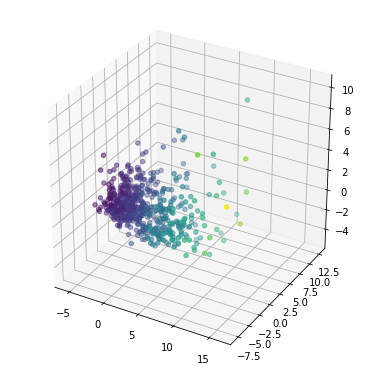

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
g = ax.scatter(transformed_df['PC1'], transformed_df['PC2'], transformed_df['PC3'], c=transformed_df['PC1'])